# Example plots

In [1]:
import pandas as pd
import numpy as np
import os, sys, site, time, math
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
from tqdm import tqdm, trange, tqdm_notebook, tnrange
tqdm.pandas()

### Import the package
### (Note: scriptpath should lead to folder above 'pvvm' folder)
# scriptpath = os.path.expanduser('~/path/to/folder/above/pvvm/')
# site.addsitedir(scriptpath)
site.addsitedir(os.path.expanduser('~/Dropbox/MITEI/Projects/REValueMap/Package'))
import pvvm
pvvm.plots.plotparams()


from matplotlib.ticker import (AutoMinorLocator, 
    MultipleLocator, AutoLocator, PercentFormatter)
pd.options.display.max_columns = 200
pd.options.display.max_rows = 24

%config InlineBackend.figure_format = 'retina'

In [2]:
### Example data
dfplot = pd.DataFrame(
    {'latitude':np.random.randn(8760)*3+40,
     'longitude':np.random.randn(8760)*3-100,
     'cf':np.random.random(8760)*.25+np.random.random(8760)*.75,
     'sin':np.sin(np.linspace(0,365*2*math.pi,8760))+np.random.randn(8760)*.1,
     'cos':np.cos(np.linspace(0,365*2*math.pi,8760))+np.random.randn(8760)*.1,
    },
    index=pd.date_range('2001-01-01','2002-01-01',freq='H',closed='left')
)

/Users/patrickbrown/Dropbox/MITEI/Projects/REValueMap/Package/pvvm/plots.py:1125: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m_in.readshapefile(mappath, 'States', drawbounds=False)


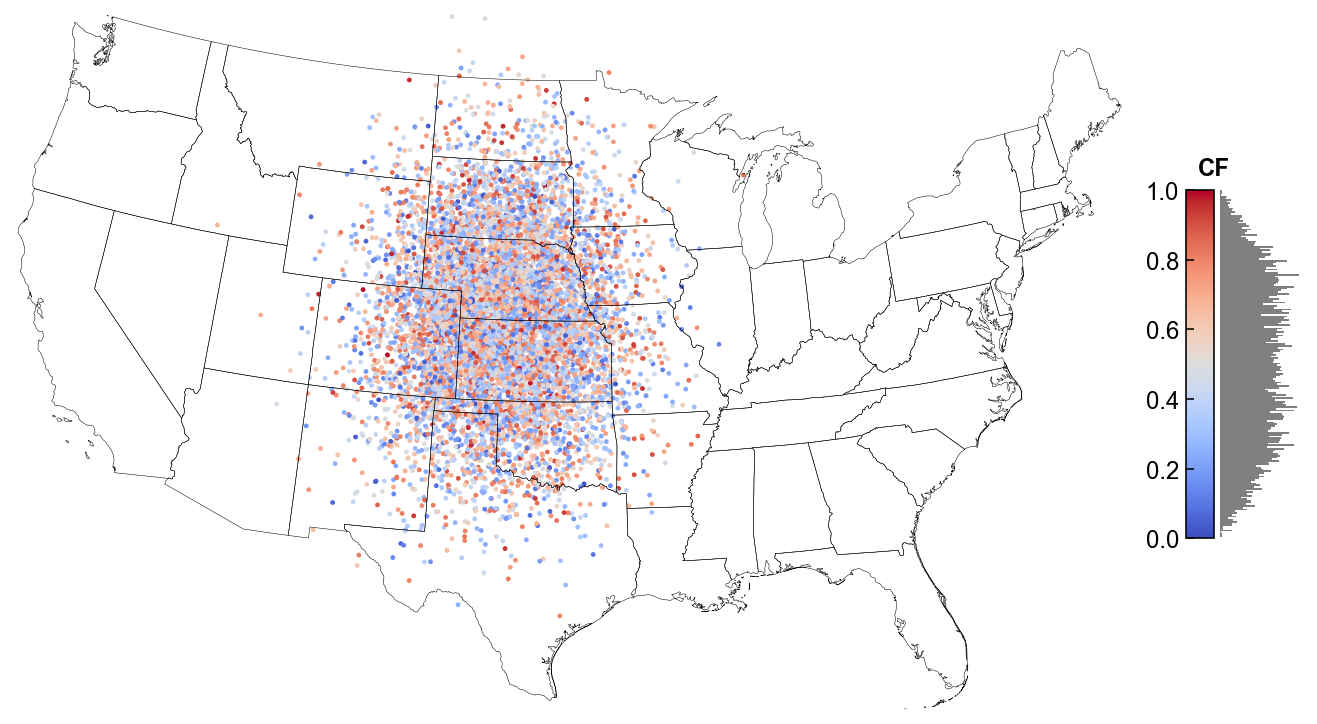

In [3]:
### US map
plt.close()
pvvm.plots.plotusascattermap(dfplot,'cf',zrange=[0,1],colorbartitle='CF',sort=False,
                             downloadmap=True)
plt.show()

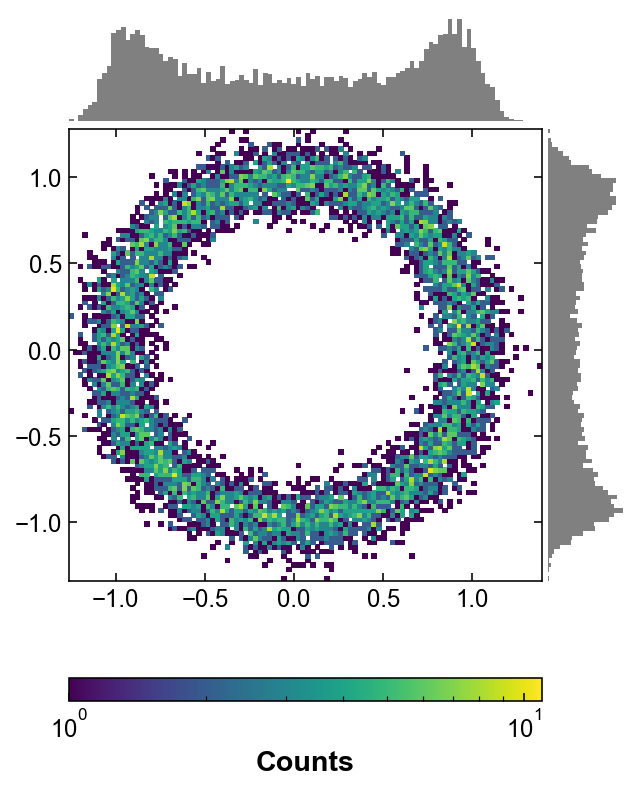

In [4]:
### 2d histogram
plt.close()
pvvm.plots.plot2dhistarray(
    dfplot.sin.values, dfplot.cos.values, bins=101)
plt.show()

/Users/patrickbrown/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


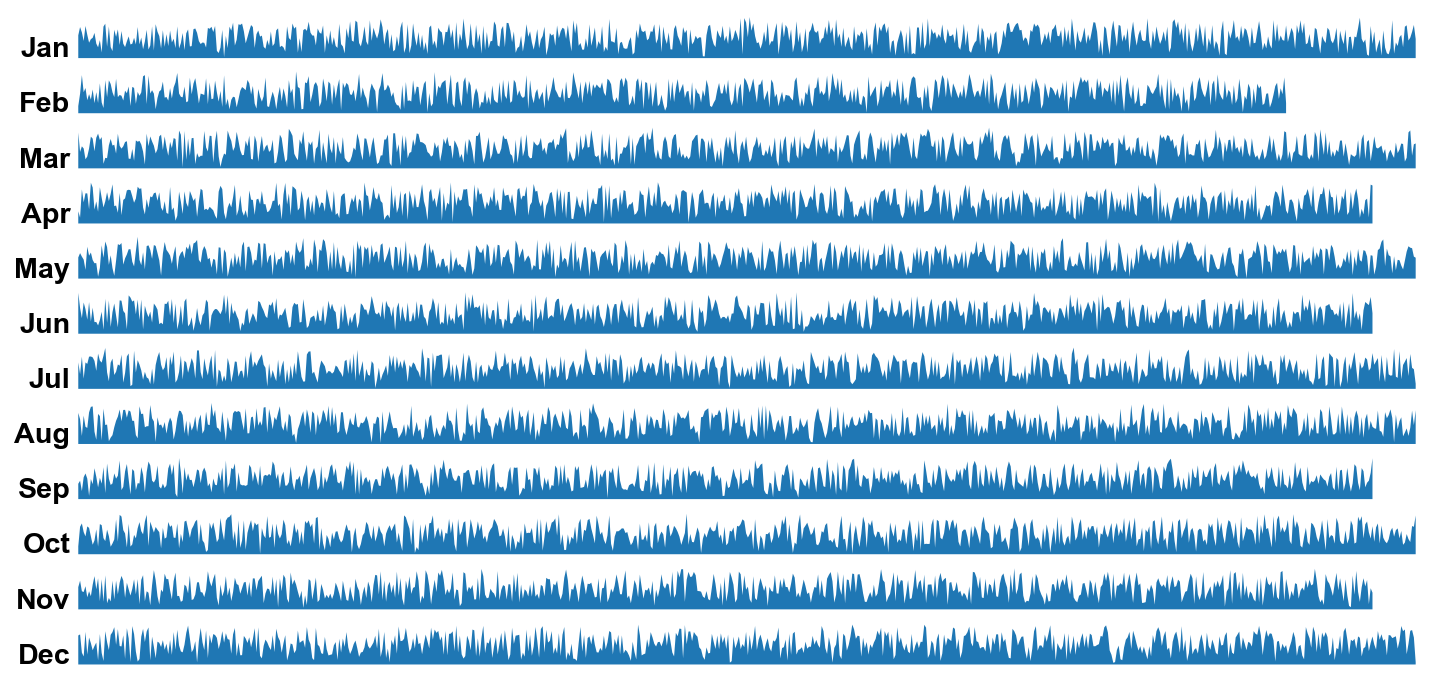

In [5]:
### Yearly timeseries
plt.close()
pvvm.plots.plotyearbymonth(dfplot.cf)
plt.show()

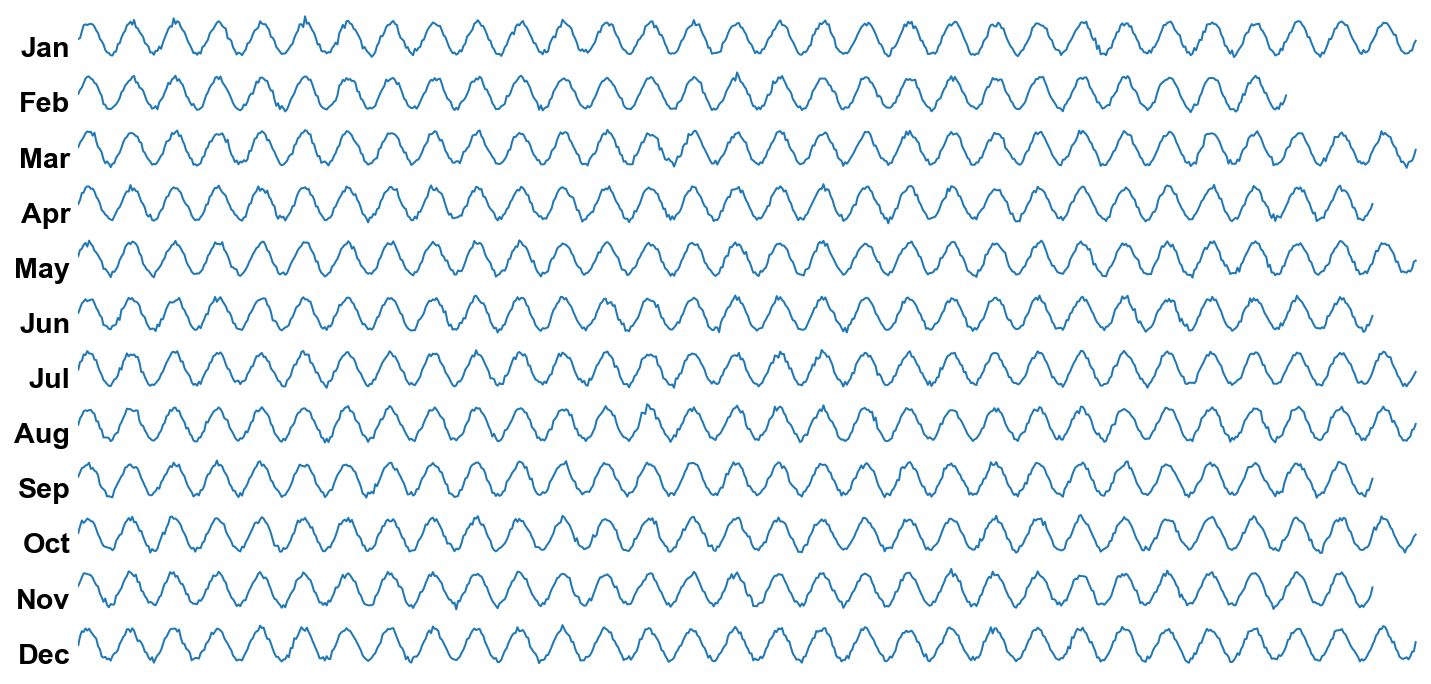

In [6]:
plt.close()
pvvm.plots.plotyearbymonth(dfplot.sin, style='line')
plt.show()

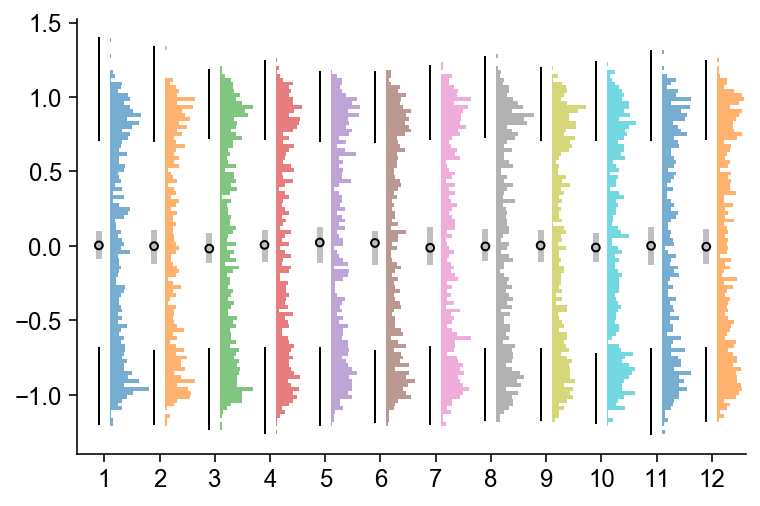

In [7]:
### Quarthists
dfplot['month'] = dfplot.index.month
dfframe = dfplot.pivot(columns='month',values='sin')

plt.close()
f,ax=plt.subplots()
pvvm.plots.plotquarthist(
    ax, dfframe)
plt.show()

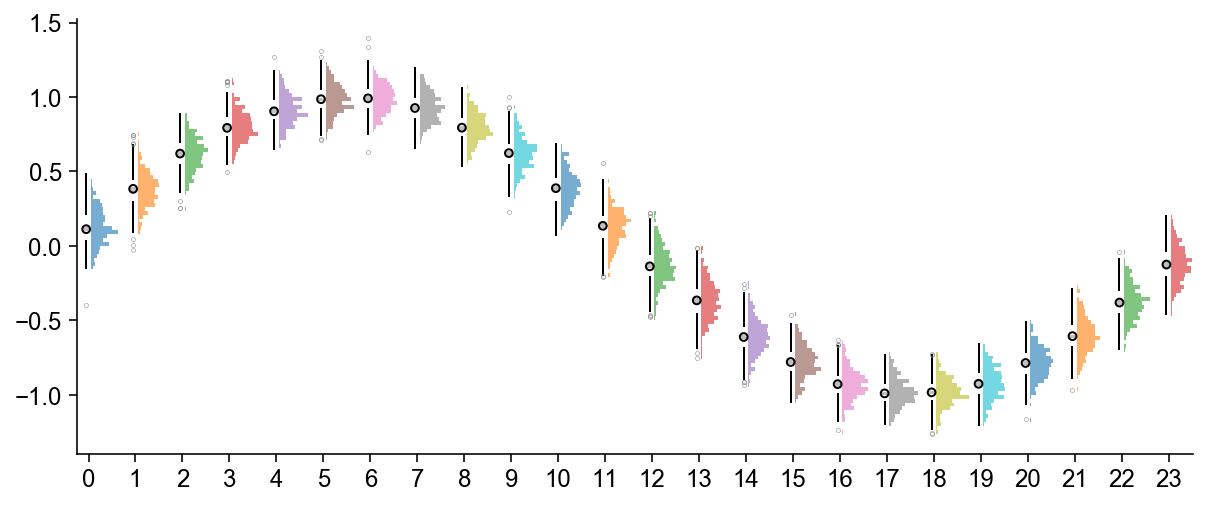

In [8]:
### Quarthists
dfplot['hour'] = dfplot.index.hour
dfframe = dfplot.pivot(columns='hour',values='sin')

plt.close()
f,ax=plt.subplots(figsize=(10,4))
pvvm.plots.plotquarthist(
    ax, dfframe, pad=0.05)
plt.show()

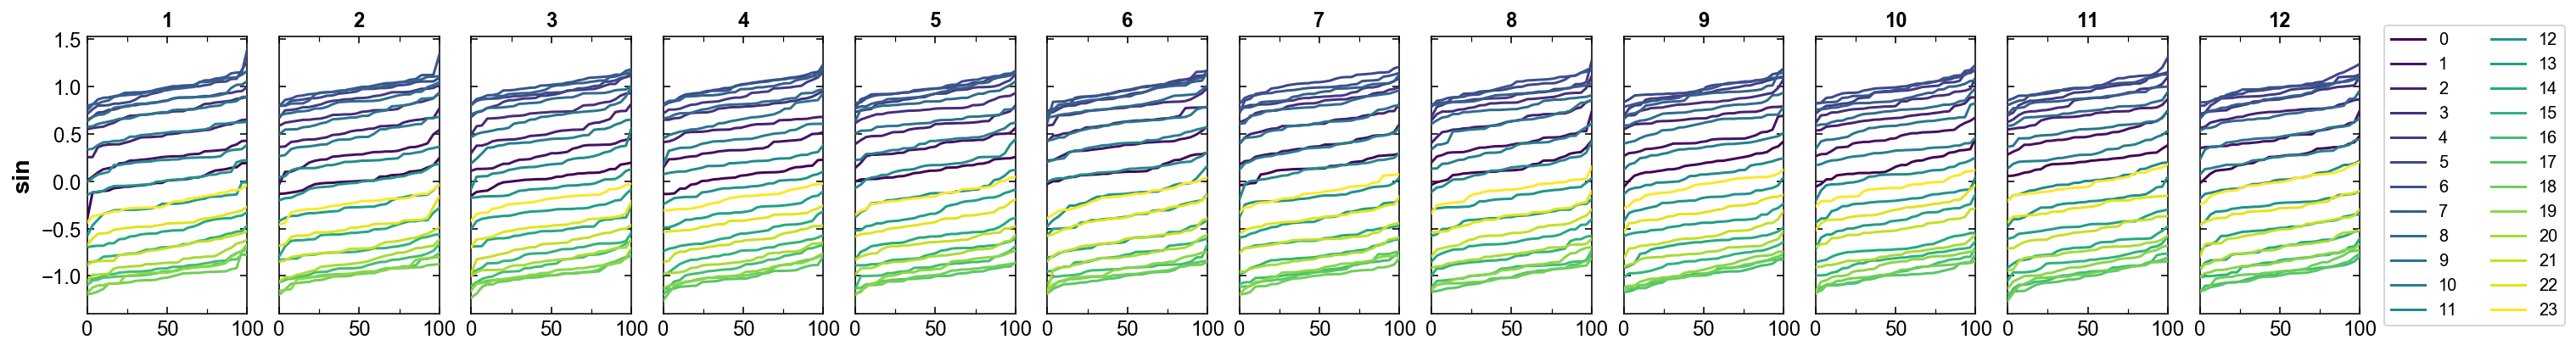

In [9]:
### Percentiles
colors = pvvm.plots.rainbowmapper(range(24))

plt.close()
f,ax = pvvm.plots.plotpercentiles(
    dfplot, datacolumn='sin', tracecolumn='hour', subplotcolumn='month', 
    colordict=colors)
ax[-1].legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=2)
plt.show()